In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline  
import os
import glob
from utils import *
import matplotlib.pyplot as plt
from ast import literal_eval
import pandas as pd
import datetime as dt
plt.rcParams['axes.facecolor']='w'
import math
plt.rcParams['axes.titlesize'] = 18
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14
plt.rcParams['legend.fontsize'] = 14
plt.rcParams['font.size'] = 16
plt.rcParams['figure.figsize'] = (16,8)

In [2]:
scored_full = TweetsDataFrame.read_csv('./scored_tweets/scored_270_4528_sorted.csv')
scored_full['createdAt'] =  scored_full.index

## Diagnosis of the process

In [ ]:
scored_full.info()

#### Tweet flow

In [ ]:
scored_full.loc[constants.STARTDATE:,'id'].resample('24H').count().plot()
plt.show()

##### on a typical day

In [ ]:
date = dt.datetime(2017,4,3)
scored_full.loc[date:date+dt.timedelta(days=1),'id'].resample('1H').count().plot()
plt.show()

In [3]:
users = scored_full.groupby('user_id').count().filter(['id'])

In [5]:
users.describe()

,id
count,1.069373e+06
mean,1.934730e+01
std,1.398574e+02
min,1.000000e+00
25%,1.000000e+00
50%,2.000000e+00
75%,7.000000e+00
max,1.517200e+04


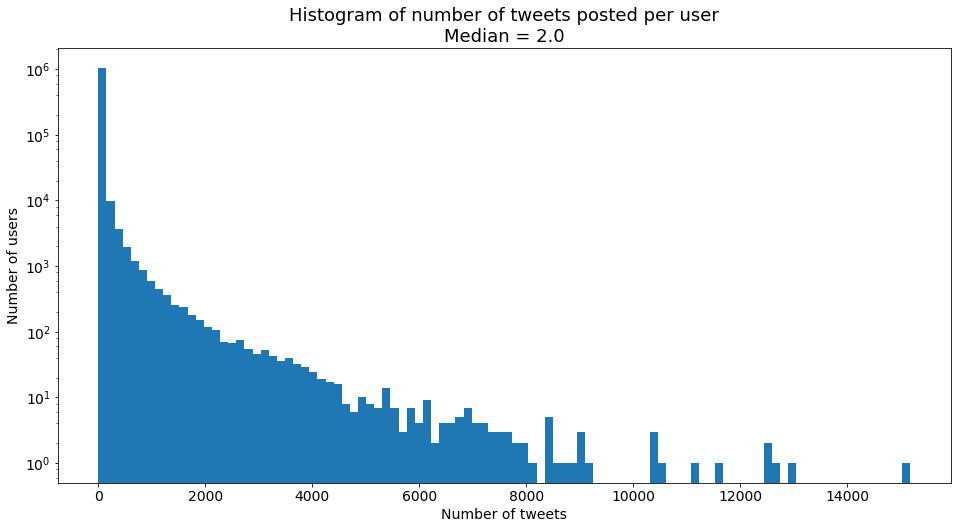

In [26]:
fig, ax = plt.subplots(facecolor='w', figsize=(16,8))
users.hist(ax=ax,bins=100, grid=False)
plt.title('Histogram of number of tweets posted per user'\
         +'\nMedian = %.1f'%(users['id'].median()))
plt.ylabel('Number of users')
plt.xlabel('Number of tweets')
plt.yscale('log')
plt.show()

#### RT / Likes

In [69]:
scored_full.filter(['favoriteCount', 'retweetCount']).describe()

,favoriteCount,retweetCount
count,2.068948e+07,2.068948e+07
mean,9.741747e-01,1.139560e+00
std,3.998242e+01,6.163896e+01
min,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00
50%,0.000000e+00,0.000000e+00
75%,0.000000e+00,0.000000e+00
max,4.850700e+04,1.201480e+05


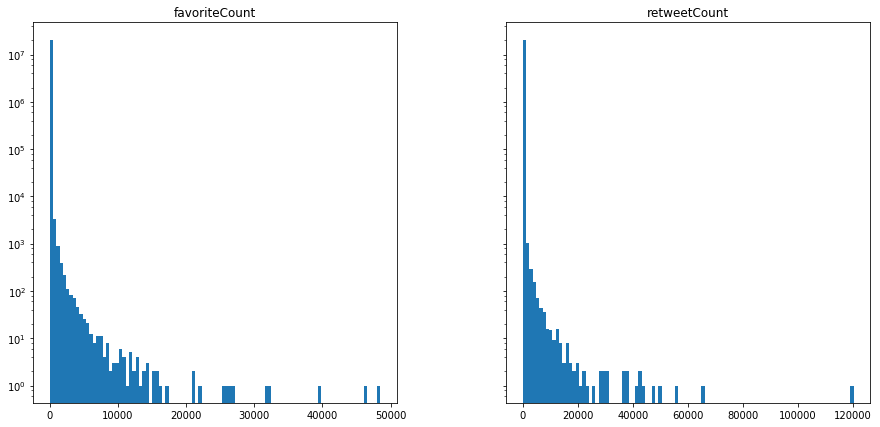

In [88]:
f, (ax1,ax2) = plt.subplots(ncols=2, figsize=(15,7), sharey=True)
scored_full.filter(['favoriteCount', 'retweetCount']).hist(ax=(ax1,ax2), bins=100, grid=False)
ax1.set_yscale('log')
plt.show()

In [89]:
rt = scored_full[scored_full['retweetCount'] >0]

In [91]:
rt['id'].describe()

count    1.367853e+06
mean     8.525309e+17
std      1.471842e+16
min      2.400286e+09
25%      8.493327e+17
50%      8.539892e+17
75%      8.572277e+17
max      8.612824e+17
Name: id, dtype: float64

#### Score

In [10]:
scored_full.filter(['score_neg', 'score_pos']).describe()

,score_neg,score_pos
count,2.068948e+07,2.068948e+07
mean,-1.128776e+00,3.344684e+00
std,1.140760e+00,1.874991e+00
min,-1.300000e+01,0.000000e+00
25%,-2.000000e+00,2.000000e+00
50%,-1.000000e+00,3.000000e+00
75%,0.000000e+00,5.000000e+00
max,0.000000e+00,1.500000e+01


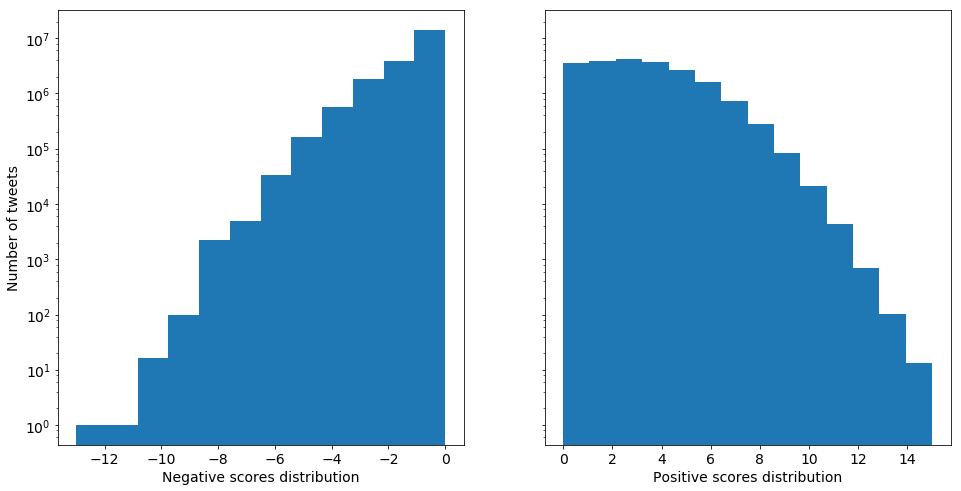

In [30]:
fig, (ax1,ax2) = plt.subplots(ncols=2, sharey=True, figsize=(16,8),facecolor='w')
scored_full['score_neg'].hist(ax=ax1, grid=False, bins=12)
scored_full['score_pos'].hist(ax=ax2, grid=False, bins=14)
ax1.set_yscale('log')
ax1.set_ylabel('Number of tweets')
ax1.set_xlabel('Negative scores distribution')
ax2.set_xlabel('Positive scores distribution')
plt.show()